In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# checking the null values
df.isnull().sum() 

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value in any of the column

In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the data are numerical and the target is contineous so we will follow regression model. From Describe we can assume that there outliers in few columns, and data needs to be scaled

In [5]:
df.rename(columns={'W':'wins','R':'run','AB':'at_bat','H':'hit','2B':'double_hit'
,'3B':'triple','HR':'home_run','BB':'base_on_balls'
,'SO':'strike_out','SB':'stolen_base','RA':'runs_allowed'
,'ER':'erned_runs','ERA':'earned_run_average','CG':'complete_game'
,'SHO':'shutouts','SV':'saves','E':'errors'},inplace=True)

Renamed the columns for convenience

# EDA

<AxesSubplot:ylabel='Count'>

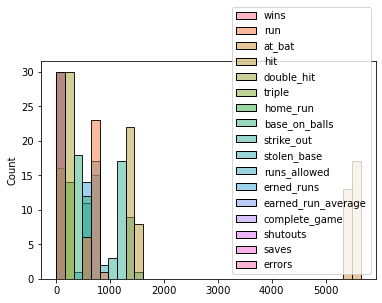

In [6]:
sns.histplot(df)

Dataset need scaling , we will do it later

<AxesSubplot:xlabel='run', ylabel='wins'>

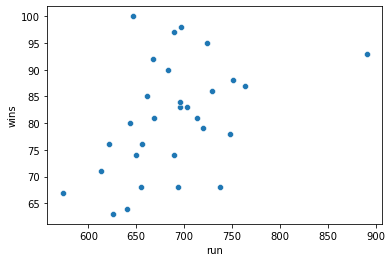

In [7]:
sns.scatterplot(x='run',y='wins',data=df)

Note: the more run the number of wins are more

<AxesSubplot:xlabel='at_bat', ylabel='wins'>

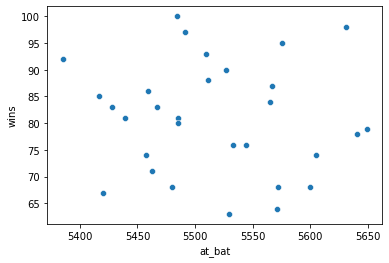

In [8]:
sns.scatterplot(x='at_bat',y='wins',data=df)

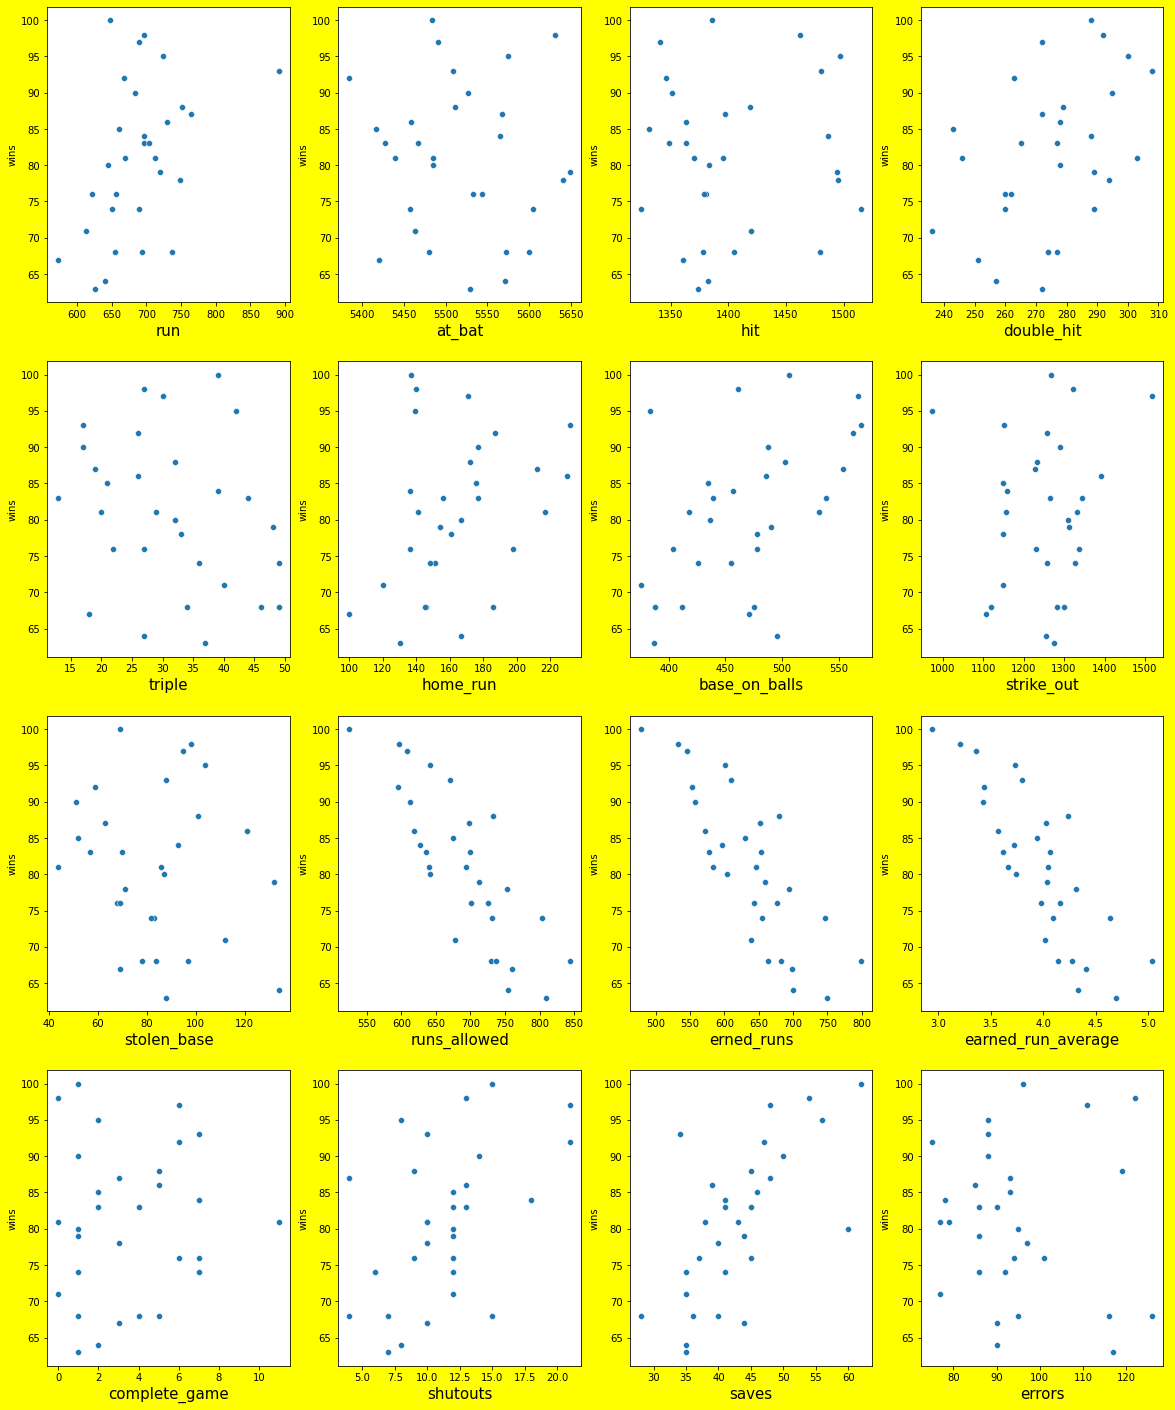

In [9]:
plt.figure(figsize=(20,25),facecolor='yellow')
num=1
for col in df.drop(columns=['wins']):
    if num<=16:
        plt.subplot(4,4,num)
        sns.scatterplot(x=col,y='wins',data=df)
        plt.xlabel(col,fontsize=15)
    num+=1
plt.show()

(i) The more run the number of wins are more 

(ii) The more double hit the number of wins are more 

(iii) The more home run the number of wins are more 

(iv) The more strike out the number of wins are more 

(v) The more teh runs allowed the wins are less 

(vi) The more earned run average the less number of wins 

(vii) The more shutouts the more number of wins 

(viii) The more number of save the chances of wins are more

Text(0.5, 1.0, 'Correlation Features')

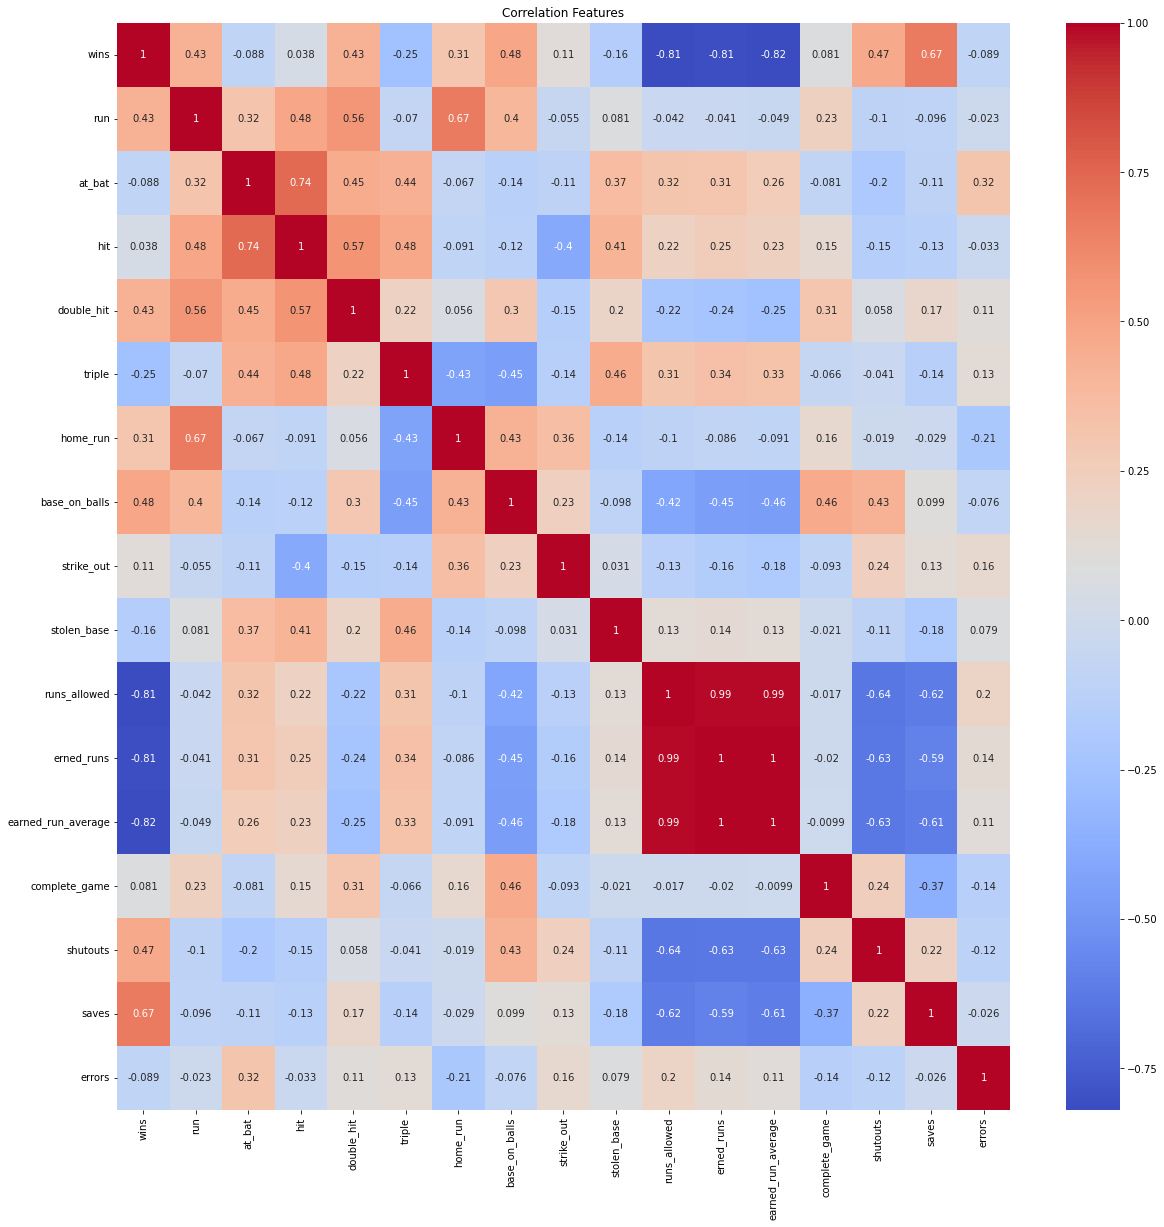

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),color='Blue',annot=True,cmap='coolwarm')
plt.title('Correlation Features')

(i) There is avalibilty of multicolinearity 

(ii) Number of wins positively corellated to 'run','double-hit','home_run','base on balls','shuouts' and 'saves' 

(iii) Number of wins is negetively corellated to 'runs allowed','earned_runs' and 'erned run avarage' 

(iv) The saves negetively correlated with runs allowed,earned runs and earned run average

In [11]:
df.describe()

,wins,run,at_bat,hit,double_hit,triple,home_run,base_on_balls,strike_out,stolen_base,runs_allowed,erned_runs,earned_run_average,complete_game,shutouts,saves,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From this statistical data any average ,maximum and percentile data can be extracted of any of the feature for example 
(i) Average run in 688 maximum run 891. 75% data within 718

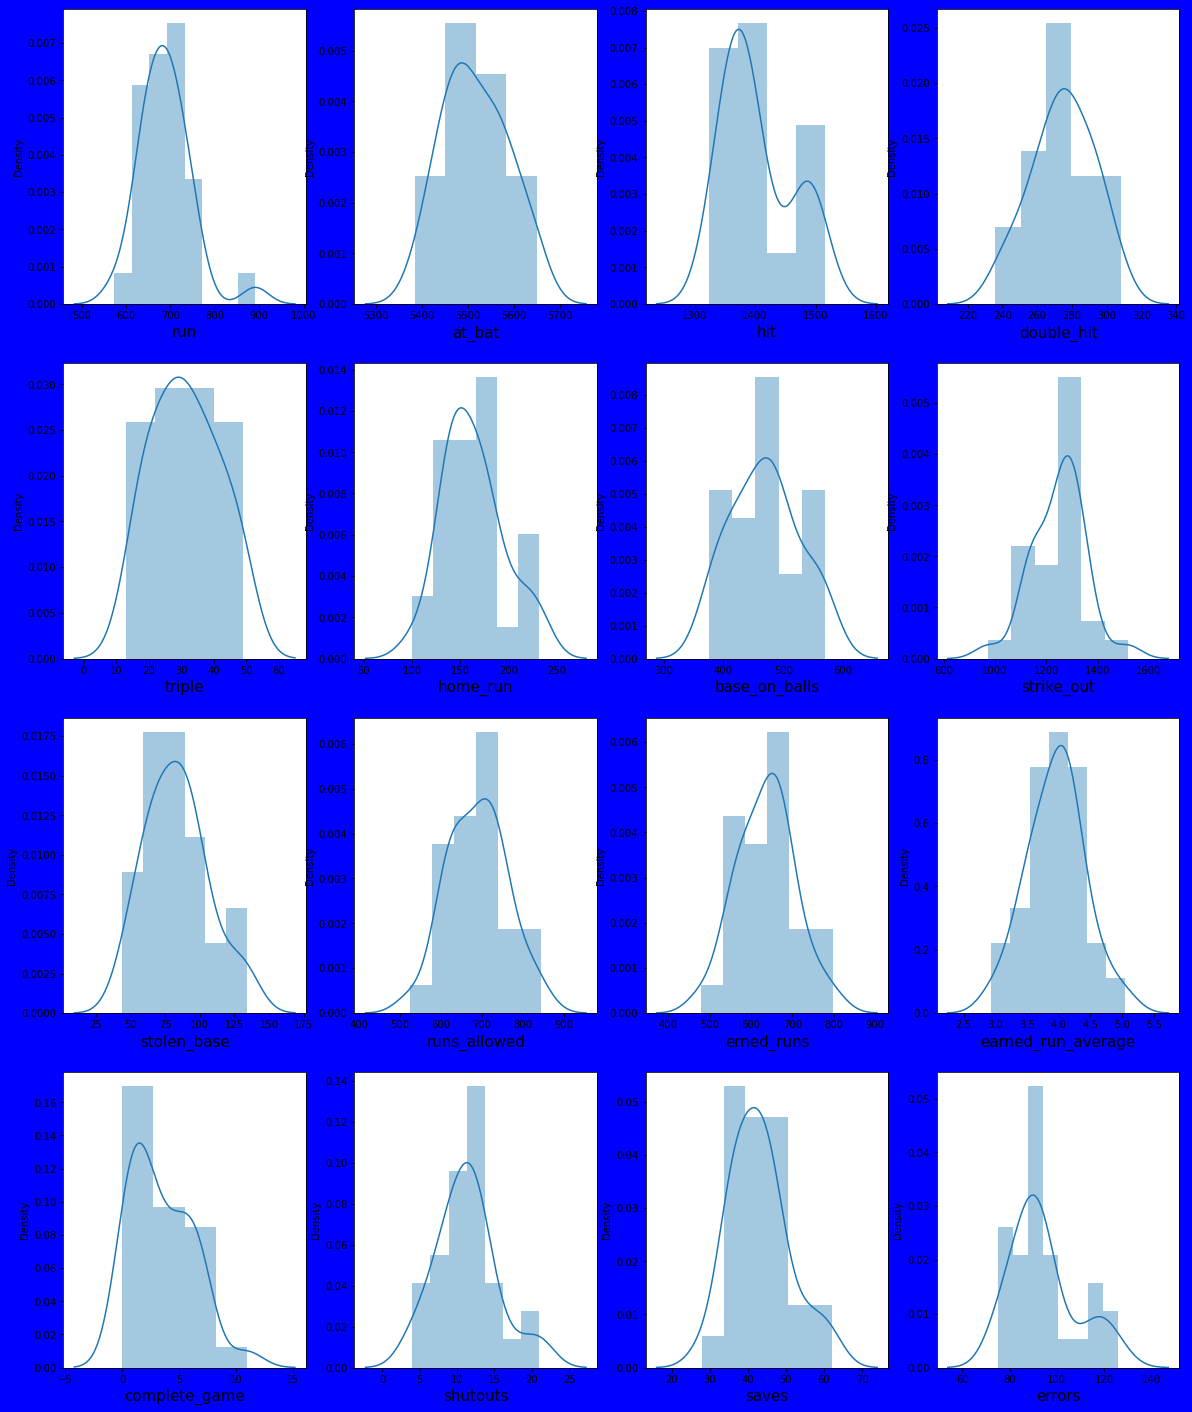

In [12]:
plt.figure(figsize=(20,25),facecolor='blue')
num=1
for col in df.drop(columns=['wins']):
    if num<=16:
        plt.subplot(4,4,num)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    num+=1
plt.show()

almost all features are in bell shape

<AxesSubplot:xlabel='base_on_balls', ylabel='shutouts'>

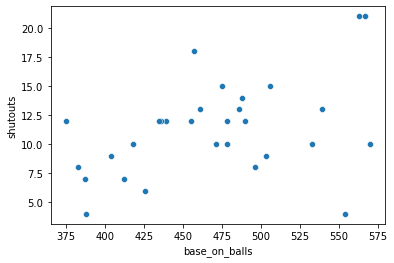

In [13]:
sns.scatterplot(x='base_on_balls',y='shutouts',data=df)

the more base on balls the shutouts will be more

<AxesSubplot:xlabel='triple', ylabel='stolen_base'>

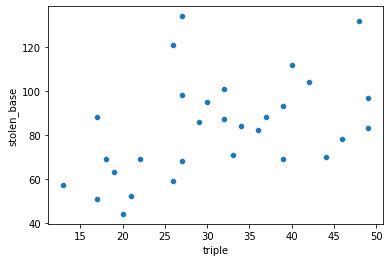

In [14]:
sns.scatterplot(x='triple',y='stolen_base',data=df)

the more triple run the stolen_base will be more

<AxesSubplot:xlabel='home_run', ylabel='run'>

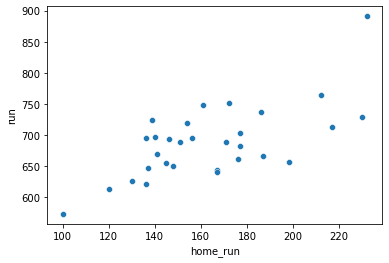

In [15]:
sns.scatterplot(x='home_run',y='run',data=df)

The number of home run will increase the run of team

<AxesSubplot:xlabel='double_hit', ylabel='run'>

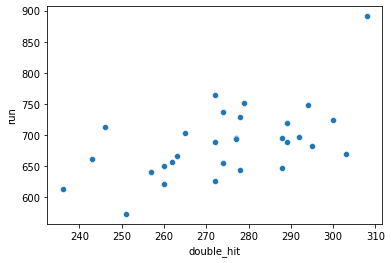

In [16]:
sns.scatterplot(x='double_hit',y='run',data=df)

the more number of double hit the run will be more

<AxesSubplot:xlabel='runs_allowed', ylabel='shutouts'>

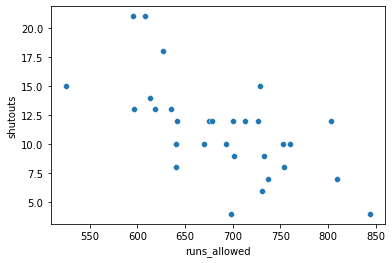

In [17]:
sns.scatterplot(x='runs_allowed',y='shutouts',data=df)

the more number of 'runs allowed' the shutouts will be less

<AxesSubplot:xlabel='runs_allowed', ylabel='saves'>

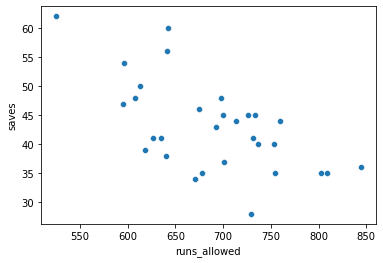

In [18]:
sns.scatterplot(x='runs_allowed',y='saves',data=df)

The more runs_alowed the saves will decrease

<AxesSubplot:xlabel='runs_allowed', ylabel='base_on_balls'>

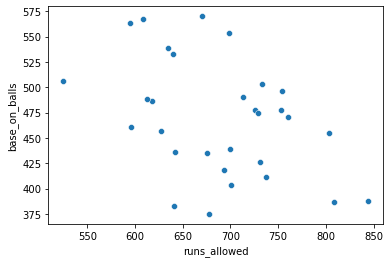

In [19]:
sns.scatterplot(x='runs_allowed',y='base_on_balls',data=df)

The number of runs allowed the base on balls will decrease

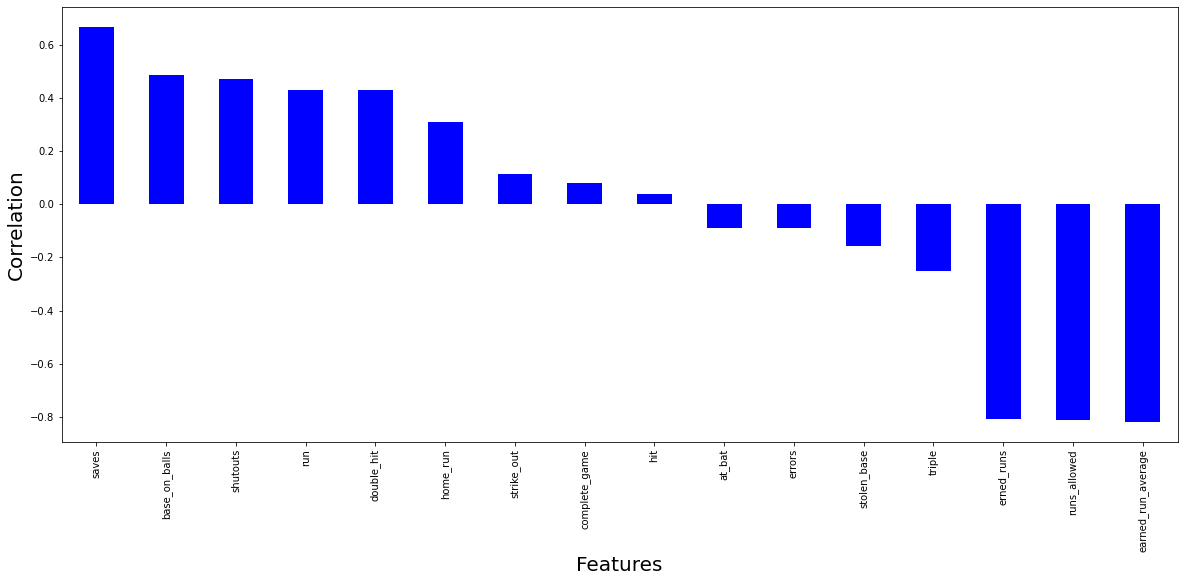

In [20]:
plt.figure(figsize=(20,8))
df.corr()['wins'].sort_values(ascending=False).drop(['wins']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Correlation',fontsize=20)
plt.show()

saves is most positively correlated with wins follwed by base on balls,shuouts,run,double hit,home run, strike out ,complete game and hit

earned run average is most negetively correlated with win followed by run allowed, earned runs, triple,stolen base, errors and at bat

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wins                30 non-null     int64  
 1   run                 30 non-null     int64  
 2   at_bat              30 non-null     int64  
 3   hit                 30 non-null     int64  
 4   double_hit          30 non-null     int64  
 5   triple              30 non-null     int64  
 6   home_run            30 non-null     int64  
 7   base_on_balls       30 non-null     int64  
 8   strike_out          30 non-null     int64  
 9   stolen_base         30 non-null     int64  
 10  runs_allowed        30 non-null     int64  
 11  erned_runs          30 non-null     int64  
 12  earned_run_average  30 non-null     float64
 13  complete_game       30 non-null     int64  
 14  shutouts            30 non-null     int64  
 15  saves               30 non-null     int64  
 16  errors    


# Feature Engineering :

# Outliers

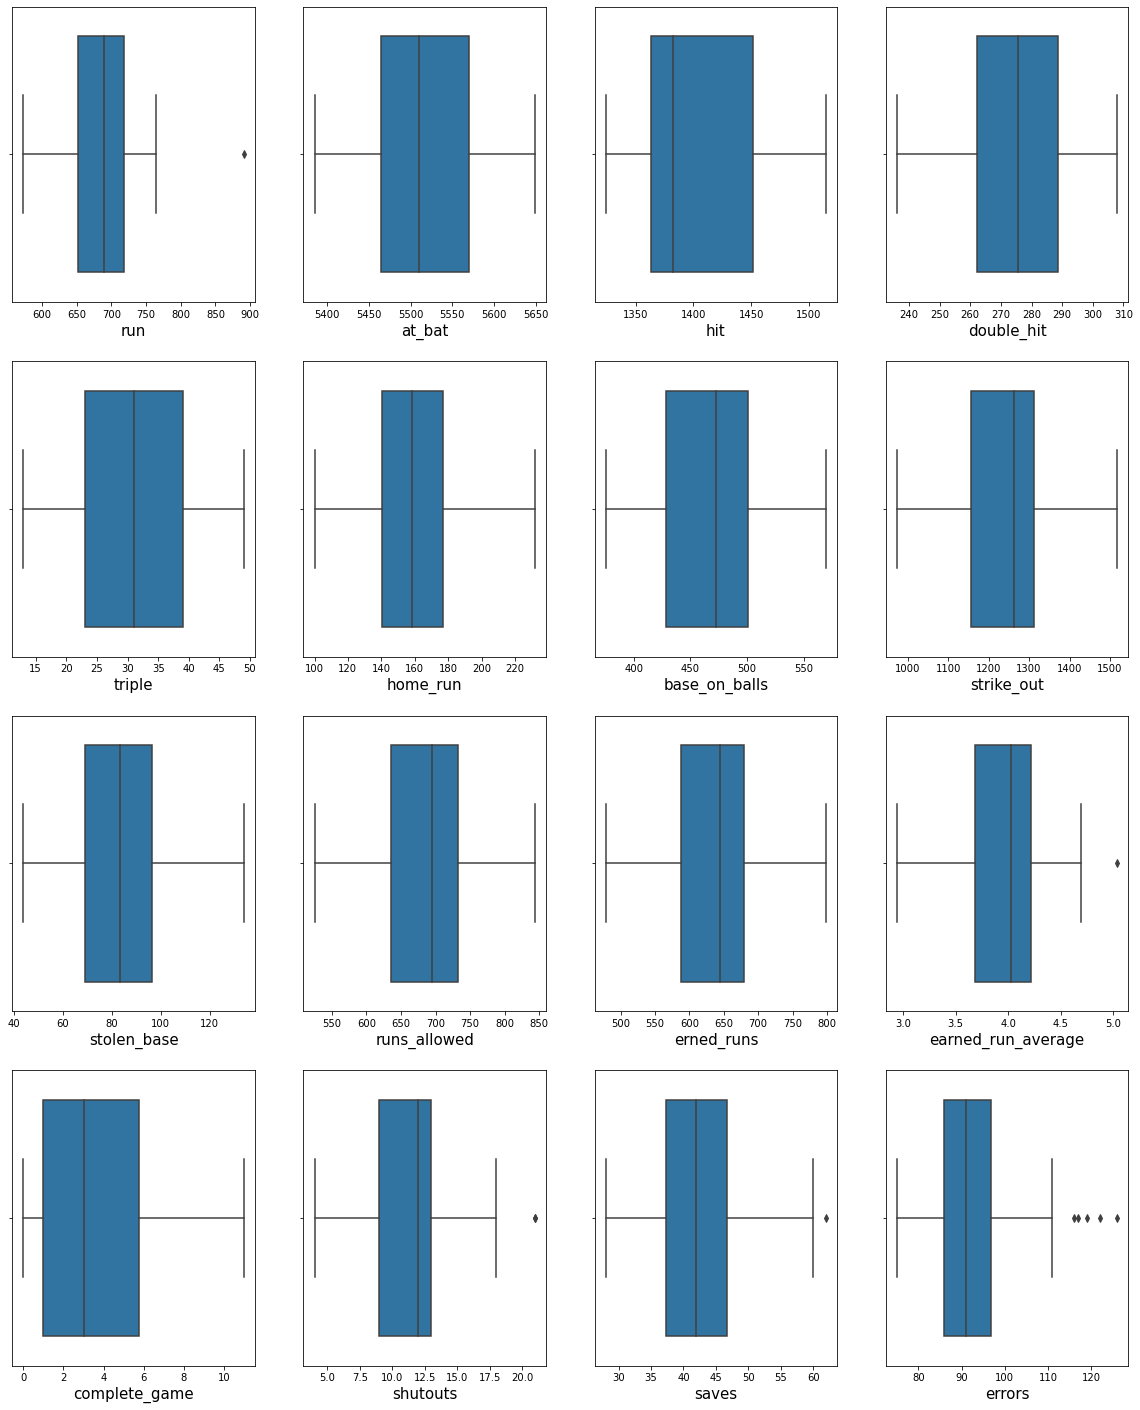

In [22]:
#checking availability of outliers
plt.figure(figsize=(20,25))
num=1
for col in df.drop(columns=['wins'],axis=1):
    if num<=16:
        plt.subplot(4,4,num)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    num+=1
plt.show()

There are outliers in saves,errors,shutouts,earned run average

In [23]:
#removing outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
df2=df
df=df[(z<3).all(axis=1)]
print('The shape before removing outliers',df2.shape)
print('The shape after removing outliers',df.shape)

The shape before removing outliers (30, 17)
The shape after removing outliers (29, 17)


after removing the outliers we will measure the loss of data

In [24]:
a=(30-29)*100/30
print('Data loss:',a)

Data loss: 3.3333333333333335


3% loss of data is in acceptable range

In [25]:
df.skew()

wins                  0.119013
run                  -0.215364
at_bat                0.169573
hit                   0.783772
double_hit           -0.335304
triple                0.090124
home_run              0.450862
base_on_balls         0.151193
strike_out           -0.233815
stolen_base           0.494966
runs_allowed          0.018155
erned_runs            0.018461
earned_run_average    0.016693
complete_game         0.854980
shutouts              0.526943
saves                 0.627480
errors                0.840271
dtype: float64

There are little skewness in 'run','double_hit','strike_out

In [26]:
df.describe()

,wins,run,at_bat,hit,double_hit,triple,home_run,base_on_balls,strike_out,stolen_base,runs_allowed,erned_runs,earned_run_average,complete_game,shutouts,saves,errors
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [27]:
# removing the skews ness of complete game
df['complete_game']=np.log(df['complete_game']+1)

In [28]:
# removing the skew ness of errors
df['errors']=np.log(df['errors'])
df['saves']=np.log(df['saves'])
df['hit']=np.log(df['hit'])

Found all the skewness has been reomoved from dataset

In [29]:
x=df.drop(columns=['wins'],axis=1)
y=df['wins']

Separated the target and features

# Scaling of Data

In [30]:
df3=x.copy() # keeping a copy for dataframe converiton

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=df3.columns)

# Removing of Multicolleinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# function to calculate the vif value of columns
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [33]:
vif_calc()

     VIF Factor            Features
0      7.138757                 run
1     18.473294              at_bat
2      9.326654                 hit
3      3.592948          double_hit
4      3.333639              triple
5      8.752553            home_run
6      3.490854       base_on_balls
7      2.894985          strike_out
8      1.969805         stolen_base
9    200.989685        runs_allowed
10  1956.771949          erned_runs
11  1523.847618  earned_run_average
12     2.795617       complete_game
13     3.606138            shutouts
14     5.210666               saves
15     2.132748              errors


(i) There is multicolleinearity among 'runs_allowed','erned_runs','earned_run_average' , we can take either of it 

(ii) There is multicolleinearity among 'at_bat','hit', we can take either of it ,

In [34]:
x.drop(['erned_runs'],axis=1,inplace=True)

# Finding the best random state and Spliting of data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [36]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=Lasso()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy is ",maxAcc,"on Random State",maxRS)

Best Accuracy is  0.9568363437055304 on Random State 82


# Model Training

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=82)

splitted data as per best random state

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso

In [42]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
svr=SVR()
SGD=SGDRegressor()
R=Ridge()
L=Lasso()
model=[lr,rfr,dtr,knn,svr,SGD,R,L]

instanciate all the regression model

In [43]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Model :" ,m)
    print("r2 score:",r2_score(y_test,y_pred))
    print("MSE :",mean_squared_error(y_test,y_pred))
    print ("MAE :",mean_absolute_error(y_test,y_pred))
    print(20*"--")

Model : LinearRegression()
r2 score: 0.5952524433435777
MSE : 29.602786574343323
MAE : 4.941059929203239
----------------------------------------
Model : RandomForestRegressor()
r2 score: 0.5792557538928973
MSE : 30.7727666666667
MAE : 4.416666666666669
----------------------------------------
Model : DecisionTreeRegressor()
r2 score: 0.18875807064185324
MSE : 59.333333333333336
MAE : 6.666666666666667
----------------------------------------
Model : KNeighborsRegressor()
r2 score: 0.5663957462969993
MSE : 31.713333333333356
MAE : 4.566666666666667
----------------------------------------
Model : SVR()
r2 score: 0.017123454172301433
MSE : 71.88649847678694
MAE : 6.880546922997539
----------------------------------------
Model : SGDRegressor()
r2 score: 0.7670497004940757
MSE : 17.037726072197177
MAE : 3.5377522142589584
----------------------------------------
Model : Ridge()
r2 score: 0.8172662277941998
MSE : 13.364945061607555
MAE : 3.299756730444797
---------------------------------

Found that Lasso is the best model for this dataset with 95% accuracy

# Cross Validation Test

In [44]:
for m in model:
    print(m,"Cross Validation Score:",cross_val_score(m,x,y,cv=5).mean())
    print(20*"--")

LinearRegression() Cross Validation Score: 0.08401490250459479
----------------------------------------
RandomForestRegressor() Cross Validation Score: -0.5804857758622648
----------------------------------------
DecisionTreeRegressor() Cross Validation Score: -2.0755415213447392
----------------------------------------
KNeighborsRegressor() Cross Validation Score: 0.023667758334592136
----------------------------------------
SVR() Cross Validation Score: -0.30115848701297193
----------------------------------------
SGDRegressor() Cross Validation Score: 0.20759661519190634
----------------------------------------
Ridge() Cross Validation Score: 0.3867966947015372
----------------------------------------
Lasso() Cross Validation Score: 0.4930418055619482
----------------------------------------


Linear Regression has got the maximum cross varification level so we select Linear Regression as final model



# Hyper Parameter Tuning


In [56]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.962667 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.955667 (0.024039) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955333 (0.025914) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957333 (0.024349) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.957333 (0.023795) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.957667 (0.023478) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957667 (0.024452) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.958333 (0.023393) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958333 (0.023393) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958667 (0.024459) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.960000 (0.022804) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960000 (0.022804) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.960000 (0.023805) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.962000 (0.021817) wi

We have got the best parameter to tune model with high performance

In [60]:
fin_mod.fit(x_train,y_train)
y_pred=fin_mod.predict(x_test)
print("Model :" ,fin_mod)
print("r2 score:",r2_score(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print ("MAE :",mean_absolute_error(y_test,y_pred))
print(20*"--")

Model : Lasso(alpha=1, normalize=False, random_state=6, selection='random')
r2 score: 0.9568272658822194
MSE : 3.1576058036698975
MAE : 1.6053370547150934
----------------------------------------


We have improved the performance of the model using hyper tuning

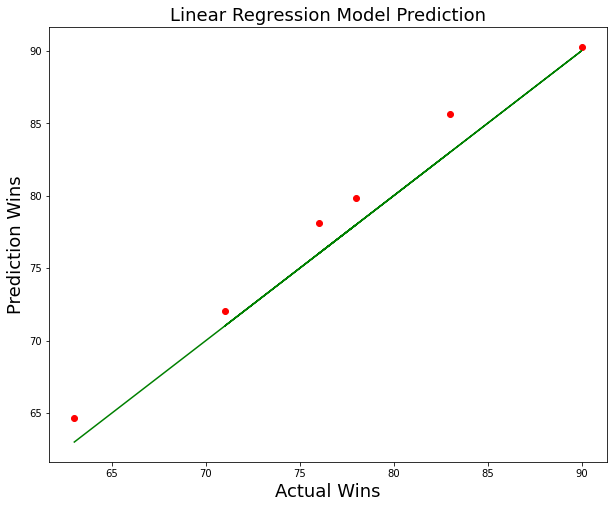

In [62]:
#visualization of model
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual Wins',fontsize=18)
plt.ylabel('Prediction Wins',fontsize=18)
plt.title('Linear Regression Model Prediction',fontsize=18)
plt.show()

The model is performing with 95 % accuracy

# Save the model


In [63]:
import joblib
joblib.dump(fin_mod,'Baseball_wining.obj')

['Baseball_wining.obj']